# Movie Recommendation - Mission 1

### Movielense Dataset EDA


EDA(Exploratory Data Analysis)는 데이터셋을 다양한 각도에서 관찰하고 인사이트를 얻을 수 있는 중요한 데이터 분석 과정입니다. 이를 잘 수행하여 데이터의 특징과 분포에 대해 깊은 이해도를 가진다면, 모델의 성능에도 큰 영향을 끼칠 수 있습니다.

본 미션에서는 Movie Recommendation 대회를 위해 제공되는 [movielens](https://grouplens.org/datasets/movielens/) 를 재구성한 대회 데이터셋에 대한 EDA를 진행하고, 학습 데이터에 더불어 영화의 side-information 데이터에 대해 이해하는 시간을 가져보겠습니다!

## 대회 데이터셋 구성
먼저 데이터셋의 구성을 살펴봅니다.

### data
    ├── directors.tsv
    ├── genres.tsv
    ├── titles.tsv
    ├── train_ratings.csv
    ├── writers.tsv
    └── years.tsv
    
1. *train_ratings.csv* : 전체 훈련 데이터.
2. *directors.tsv*, *genres.tsv*, *writers.tsv*, *years.tsv*, *titles.tsv* : 영화의 side-information 데이터.

## train/test 데이터셋 알아보기

Pandas를 이용하여 train 데이터를 로드하고 데이터 구성을 알아봅니다. 이어지는 코드를 실행하면 데이터셋의 간략한 정보와 샘플을 확인할 수 있습니다.

train 데이터셋은 *user, item, time* 세개의 column으로 구성된 반면, test 데이터셋은 *user* column과 비어있는 *item* column으로 구성되어 있음을 참고해 주세요. 대회 진행시, 각각의 사용자에게 10개의 영화를 추천하게 됩니다.

각 column은 다음을 나타냅니다.
- *user*: 사용자 id.
- *item*: 영화 id.
- *time*: 사용자가 해당 영화와 interact한 시간. (UNIX시간의 초 단위)

영화 id는 *directors.tsv, genres.tsv, writers.tsv, years.tsv, titles.tsv*에서도 일관적으로 사용됩니다. 즉, 동일한 영화 id는 side information 데이터셋에서 동일한 영화를 나타냅니다.

이어지는 cell들을 실행해서 직접 관찰해보세요!

## 데이터 다운로드
이곳에 대회 사이트(AI Stages)에 있는 data의 URL을 입력해주세요. 
- 데이터 URL은 변경될 수 있습니다.
- 예) `!wget https://aistages-prod-server-public.s3.amazonaws.com/app/Competitions/000176/data/data.tar.gz`

In [1]:
direc_path = '/opt/ml/input/data'

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import os

In [3]:
data_path = os.path.join(direc_path,'train')
train_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv')) # 전체 학습 데이터

In [4]:
# train_df.info()

train_df.head(5)

,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539
3,11,616,1230782542
4,11,2140,1230782563


In [5]:
num_train_users = train_df['user'].nunique()
num_train_items = train_df['item'].nunique()

print ("Number of unique train users: ", num_train_users)
print ("Number of unique train items: ", num_train_items)

Number of unique train users:  31360
Number of unique train items:  6807


In [6]:
print("Data sparsity ratio: ", 1 - len(train_df) / (num_train_users * num_train_items))

Data sparsity ratio:  0.9758536052697853


데이터의 sparsity ratio는 약 97.6%로 일반적인 추천 시스템 데이터셋에 비해 굉장히 dense한 (행렬 상 이력의 많은 부분이 채워져 있는) 데이터임을 알 수 있습니다.

## 2 특징 살펴보기

### 유저, 장르

유저가 어떤 장르를 선호하는지 check

#### user별 genre 시청 횟수 dataframe

In [7]:
user_genre_df = pd.read_csv("./user_genre.csv")

user_genre_df.head()

,user,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,11,167,133,50,53,99,33,5,112,67,2,58,11,25,44,176,130,12,1
1,14,23,58,40,57,106,9,0,66,34,0,0,22,6,55,23,10,5,4
2,18,3,3,1,1,28,20,1,62,3,1,2,2,7,25,2,9,9,4
3,25,22,21,5,9,40,21,0,41,14,0,6,2,5,17,8,16,5,1
4,31,92,94,32,44,49,12,2,24,47,0,7,0,9,10,49,36,5,6


#### merge, get_dummies를 이용하여 user별 genre 시청 횟수 dataframe 간단하게 만들어보기

In [80]:
genre_data = pd.read_csv(os.path.join(data_path, 'genres.tsv'), sep='\t')

In [81]:
genre_df = pd.merge(train_df, genre_data, on=['item'])

genre_df.head()

,user,item,time,genre
0,11,4643,1230782529,Action
1,11,4643,1230782529,Adventure
2,11,4643,1230782529,Drama
3,11,4643,1230782529,Sci-Fi
4,189,4643,1302945016,Action


In [33]:
genre_cat = genre_df['genre'].astype('category').values

genre_code = {g:i for i,g in enumerate(genre_cat.categories)}

genre_code

{'Action': 0,
 'Adventure': 1,
 'Animation': 2,
 'Children': 3,
 'Comedy': 4,
 'Crime': 5,
 'Documentary': 6,
 'Drama': 7,
 'Fantasy': 8,
 'Film-Noir': 9,
 'Horror': 10,
 'Musical': 11,
 'Mystery': 12,
 'Romance': 13,
 'Sci-Fi': 14,
 'Thriller': 15,
 'War': 16,
 'Western': 17}

In [34]:
genre_df['genre_code'] = genre_cat.codes

In [37]:
genre_one_hot = pd.get_dummies(genre_df['genre'])

In [38]:
genre_one_hot['user'] = genre_df['user']

In [42]:
for name, group in genre_one_hot.groupby('user'):
    print(name)
    print(group['Action'].sum()) # 이런 식으로 합치면 만들 수 있을 것 같다
    break

11
167


#### 만들어진 user_genre dataframe을 이용하여 user별 장르 선호도 뽑아내기

In [73]:
# 유저별 선호 장르 뽑아내기
# 1) use_mean == True: 평균 이상 시청한 장르 뽑아내기
# 2) use_mean == False: median 이상 시청한 장르 뽑아내기
def user_preference_genre(df,use_mean=True):
    users = np.unique(df['user'])
    genres = [c for c in df.columns if c != 'user']
    row = []
    for u in users:
        arr = df.loc[df['user'] == u, genres].to_numpy().squeeze()
        criteria = arr.mean() if use_mean else np.median(arr)
        r = [u] + list(np.where(arr >= criteria,1,0))
        row.append(r)
    user_pref_genre_df = pd.DataFrame(row, columns=df.columns)
    return user_pref_genre_df

In [74]:
user_pref_genre_mean = user_preference_genre(user_genre_df)

user_pref_genre_mean.head()

,user,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,11,1,1,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0
1,14,0,1,1,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0
2,18,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0
3,25,1,1,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0
4,31,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0


In [77]:
user_pref_genre_mean.head()

,user,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,11,1,1,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0
1,14,0,1,1,1,1,0,0,1,1,0,0,0,0,1,0,0,0,0
2,18,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0
3,25,1,1,0,0,1,1,0,1,1,0,0,0,0,1,0,1,0,0
4,31,1,1,1,1,1,0,0,0,1,0,0,0,0,0,1,1,0,0


In [75]:
user_genre_df.head()

,user,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,11,167,133,50,53,99,33,5,112,67,2,58,11,25,44,176,130,12,1
1,14,23,58,40,57,106,9,0,66,34,0,0,22,6,55,23,10,5,4
2,18,3,3,1,1,28,20,1,62,3,1,2,2,7,25,2,9,9,4
3,25,22,21,5,9,40,21,0,41,14,0,6,2,5,17,8,16,5,1
4,31,92,94,32,44,49,12,2,24,47,0,7,0,9,10,49,36,5,6


In [78]:
print(len(user_pref_genre_mean))

31360


### timestamp(시청 시간), year(개봉 연도)

* 개봉연도는 1922-2014까지 다양하지만 시청연도는 2005-2015까지 비교적 현대이다
* 개봉연도에 맞게 시청을 했는지 살펴보려했지만 큰 의미가 없을 것 같다
* 유저가 몇년도에 개봉한 영화를 더 좋아하는지 살펴보는 것이 더 좋을 것같다.

In [84]:
import time

In [85]:
train_df.head()

,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539
3,11,616,1230782542
4,11,2140,1230782563


In [92]:
# year.tsv에 저장된 연도 구하기
year_data = pd.read_csv(os.path.join(data_path, 'years.tsv'), sep='\t')

year = np.unique(year_data['year'])

year

array([1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014])

In [104]:
def time2year(t):
    return time.localtime(t).tm_year

In [107]:
# train_ratings.csv에 저장된 시간 현재 연도로 바꾸기
converted_year_df = train_df.copy()

converted_year_df['time'] = converted_year_df['time'].apply(time2year)

In [108]:
np.unique(converted_year_df['time'])

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

### user, director

* user가 어떤 감독의 영화를 선호는지 구하기

In [7]:
director_data = pd.read_csv(os.path.join(data_path, 'directors.tsv'), sep='\t')

director_movie = np.unique(director_data['item'])
directors = np.unique(director_data['director'])

print(len(directors))
print(len(director_movie))

1340
5503


In [8]:
# train_rating.csv, directors.tsv 합치기

director_df = pd.merge(train_df, director_data, on=['item'])

director_df.head()

,user,item,time,director
0,11,4643,1230782529,nm0000318
1,189,4643,1302945016,nm0000318
2,294,4643,1288437662,nm0000318
3,383,4643,1261996844,nm0000318
4,421,4643,1190624541,nm0000318


In [9]:
director_df

,user,item,time,director
0,11,4643,1230782529,nm0000318
1,189,4643,1302945016,nm0000318
2,294,4643,1288437662,nm0000318
3,383,4643,1261996844,nm0000318
4,421,4643,1190624541,nm0000318
...,...,...,...,...
5407503,126426,102880,1386260290,nm0796117
5407504,127766,102880,1386261575,nm0796117
5407505,130972,102880,1391096866,nm0796117
5407506,131347,102880,1370143675,nm0796117


In [135]:
row = [ [u]+[0] * len(directors) for u in np.unique(train_df['user'])]

user_prefer_director_df = pd.DataFrame(row, columns=['user'] + list(directors))

In [136]:
user_prefer_director_df

,user,nm0000005,nm0000019,nm0000033,nm0000036,nm0000037,nm0000040,nm0000041,nm0000045,nm0000059,...,nm2284484,nm2304017,nm2320658,nm2480587,nm2482088,nm2588606,nm2648685,nm2676052,nm2879822,nm9054338
0,11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,31,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31355,138473,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31356,138475,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31357,138486,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31358,138492,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 각 감독이 몇 편의 영화를 찍었는지 체크하기

In [38]:
movie_count_per_director = director_data['director'].value_counts()

movie_count_per_director

nm0000095    44
nm0000033    33
nm0000142    31
nm0000229    29
nm0000217    26
             ..
nm0404606     2
nm0405605     2
nm0410139     2
nm0410769     2
nm9054338     2
Name: director, Length: 1340, dtype: int64

In [53]:
max_count = max(movie_count_per_director)
min_count = min(movie_count_per_director)

x = np.arange(min_count,max_count+1,1)
y = []
for cnt in range(min_count,max_count+1):
    y.append((movie_count_per_director == cnt).sum())

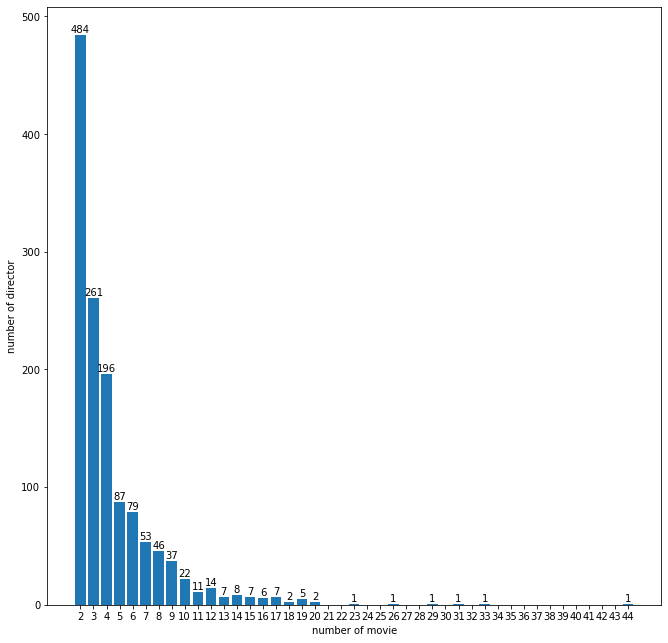

In [54]:
fig,ax = plt.subplots(figsize=(11,11))
ax.set_xticks(x)
ax.set_xlabel('number of movie')
ax.set_ylabel('number of director')
rects = ax.bar(x,y)

for rect in rects:
    x = rect.get_x()
    width = rect.get_width()
    height = int(rect.get_height())
    if height != 0:
        ax.text(x+width/2,height+2,str(height),ha='center')

In [68]:
def counting_director(movie_count_per_director,number_of_movie):
    return (movie_count_per_director >= number_of_movie).sum()

In [69]:
counting_director(movie_count_per_director,10)

97

보통 감독이 2편이상 찍었고 많게는 44편까지 찍은 감독도 존재한다.

* 총 감독 수: 1340명
* 총 20편 이상 찍은 감독: 8명 (약 0.5%)
* 총 15편 이상 찍은 감독: 35명 (약 2%)
* 총 10편 이상 찍은 감독: 97명 (약 7%)
* 총 5편 이상 찍은 감독: 399명 (약 29%)
* 총 3편 이상 찍은 감독: 856명 (약 63%)

#### 2편 이상 찍은 감독의 영화를 사람들이 얼마나 봤는지 체크하기

In [110]:
def director_make_k_movies(movie_count_per_director, k):
    return set([ i for i in movie_count_per_director.index if movie_count_per_director[i] >= k])

In [111]:
director_3 = director_make_k_movies(movie_count_per_director,3)
director_5 = director_make_k_movies(movie_count_per_director,5)
director_10 = director_make_k_movies(movie_count_per_director,10)
director_15 = director_make_k_movies(movie_count_per_director,15)
director_20 = director_make_k_movies(movie_count_per_director, 20)

In [113]:
def director_k_watched(director_df,director_k):
    return {director_id:director_df['director'].value_counts()[director_id] for director_id in director_df['director'].value_counts().index if director_id in director_k}

In [114]:
director_3_watched = director_k_watched(director_df, director_3)
director_5_watched = director_k_watched(director_df, director_5)
director_10_watched = director_k_watched(director_df, director_10)
director_15_watched = director_k_watched(director_df, director_15)
director_20_watched = director_k_watched(director_df, director_20)

In [120]:
def percentage_director_k_watched(director_df, k,director_watched):
    print(f"전체 시청 이력 수: {len(director_df)}")
    print(f"{k}편 이상 시청 이력 수: {sum(director_watched.values())}")
    print(f"{int(sum(director_watched.values())/len(director_df) * 100)}%")
    return int(sum(director_watched.values())/len(director_df) * 100)

In [121]:
director_3_p = percentage_director_k_watched(director_df,3,director_3_watched)
print("-----------------------------")
director_5_p = percentage_director_k_watched(director_df,5,director_5_watched)
print("-----------------------------")
director_10_p =percentage_director_k_watched(director_df,10,director_10_watched)
print("-----------------------------")
director_15_p = percentage_director_k_watched(director_df,15,director_15_watched)
print("-----------------------------")
director_20_p =percentage_director_k_watched(director_df,20,director_20_watched)
print("-----------------------------")

전체 시청 이력 수: 5407508
3편 이상 시청 이력 수: 4963672
91%
-----------------------------
전체 시청 이력 수: 5407508
5편 이상 시청 이력 수: 3933975
72%
-----------------------------
전체 시청 이력 수: 5407508
10편 이상 시청 이력 수: 1928963
35%
-----------------------------
전체 시청 이력 수: 5407508
15편 이상 시청 이력 수: 910779
16%
-----------------------------
전체 시청 이력 수: 5407508
20편 이상 시청 이력 수: 354766
6%
-----------------------------


* 총 감독 수: 1340명
    * 총 20편 이상 찍은 감독: 8명 (약 0.5%)
    * 총 15편 이상 찍은 감독: 35명 (약 2%)
    * 총 10편 이상 찍은 감독: 97명 (약 7%)
    * 총 5편 이상 찍은 감독: 399명 (약 29%)
    * 총 3편 이상 찍은 감독: 856명 (약 63%)

3편 이상 찍은 감독이 전체 시청 이력중 91% 정도 차지

나머지 39%의 감독(영화 갯수 2개)이 찍은 영화의 시청 이력은 9% 정도 차지

* 총 5407508 시청 이력 중
    * 20편 이상 찍은 감독의 영화를 본 이력이 354766 존재: 약 6%
    * 15편 이상 찍은 감독의 영화를 본 이력이 910779 존재: 약 16%
    * 10편 이상 찍은 감독의 영화를 본 이력이 1928963 존재: 약 35%
    * 5편 이상 찍은 감독의 영화를 본 이력이 3933975 존재: 약 72%
    * 3편 이상 찍은 감독의 영화를 본 이력이 4963672 존재: 약 91%

### user, writer

In [123]:
writer_data = pd.read_csv(os.path.join(data_path, 'writers.tsv'), sep='\t')
writer = np.unique(writer_data['writer'])
print(len(writer))

2989


In [124]:
writer_df = pd.merge(train_df, writer_data, on=['item'])

writer_df

,user,item,time,writer
0,11,4643,1230782529,nm0099541
1,11,4643,1230782529,nm0115310
2,11,4643,1230782529,nm0465199
3,11,4643,1230782529,nm0742797
4,189,4643,1302945016,nm0099541
...,...,...,...,...
11278910,130972,102880,1391096866,nm1729428
11278911,131347,102880,1370143675,nm0796117
11278912,131347,102880,1370143675,nm1729428
11278913,134144,102880,1371381972,nm0796117


train.csv와 writers.tsv 합치면 총 11278915 이력이 생성된다.

In [125]:
movie_count_per_writer = writer_data['writer'].value_counts()

movie_count_per_writer

nm0000095    47
nm0000636    35
nm0000175    32
nm0372942    30
nm0000108    29
             ..
nm0414893     2
nm0414448     2
nm0414117     2
nm0414047     2
nm5927608     2
Name: writer, Length: 2989, dtype: int64

In [126]:
writer_set = set(writer)
director_set = set(np.unique(director_data['director']))

print(len(writer_set))
print(len(director_set))

2989
1340


In [128]:
print(f"the number of writer and director: {len(writer_set & director_set)}")

the number of writer and director: 676


감독과 작가 수 비교
* 감독이면서 작가인 사람 총 676명
* 감독만: 664명
* 작가만: 2313명

In [130]:
max_count = max(movie_count_per_writer)
min_count = min(movie_count_per_writer)

x = np.arange(min_count,max_count+1,1)
y = []
for cnt in range(min_count,max_count+1):
    y.append((movie_count_per_writer == cnt).sum())

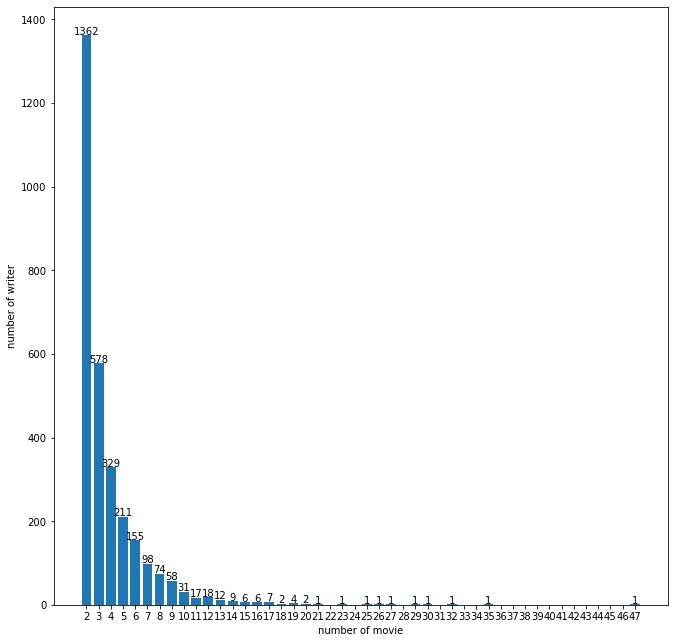

In [131]:
fig,ax = plt.subplots(figsize=(11,11))
ax.set_xticks(x)
ax.set_xlabel('number of movie')
ax.set_ylabel('number of writer')
rects = ax.bar(x,y)

for rect in rects:
    x = rect.get_x()
    width = rect.get_width()
    height = int(rect.get_height())
    if height != 0:
        ax.text(x+width/2,height+2,str(height),ha='center')

In [132]:
def counting_writer(movie_count_per_writer,number_of_movie):
    return (movie_count_per_writer >= number_of_movie).sum()

In [133]:
writer_20_count = counting_writer(movie_count_per_writer,20)
writer_15_count = counting_writer(movie_count_per_writer,15)
writer_10_count = counting_writer(movie_count_per_writer,10)
writer_5_count = counting_writer(movie_count_per_writer,5)
writer_3_count = counting_writer(movie_count_per_writer,3)

In [134]:
print(writer_20_count,writer_15_count,writer_10_count, writer_5_count, writer_3_count)

12 37 124 720 1627


전체 2989명의 작가중
* 20편 이상 쓴 작가: 12명 (0.4%)
* 15편 이상 쓴 작가: 37명 (1%)
* 10편 이상 쓴 작가: 124명 (4%)
* 5편 이상 쓴 작가: 720명 (24%)
* 3편 이상 쓴 작가: 1627명 (54%)

In [135]:
def writer_make_k_movies(movie_count_per_writer, k):
    return set([ i for i in movie_count_per_writer.index if movie_count_per_writer[i] >= k])

In [136]:
def writer_k_watched(writer_df,writer_k):
    return {writer_id:writer_df['writer'].value_counts()[writer_id] for writer_id in writer_df['writer'].value_counts().index if writer_id in writer_k}

In [138]:
writer_3 = writer_make_k_movies(movie_count_per_writer,3)
writer_5 = writer_make_k_movies(movie_count_per_writer,5)
writer_10 = writer_make_k_movies(movie_count_per_writer,10)
writer_15 = writer_make_k_movies(movie_count_per_writer,15)
writer_20 = writer_make_k_movies(movie_count_per_writer,20)

writer_3_watched = writer_k_watched(writer_df, writer_3)
writer_5_watched = writer_k_watched(writer_df, writer_5)
writer_10_watched = writer_k_watched(writer_df, writer_10)
writer_15_watched = writer_k_watched(writer_df, writer_15)
writer_20_watched = writer_k_watched(writer_df, writer_20)

In [139]:
def percentage_writer_k_watched(writer_df, k,writer_watched):
    print(f"전체 시청 이력 수: {len(writer_df)}")
    print(f"{k}편 이상 시청 이력 수: {sum(writer_watched.values())}")
    print(f"{int(sum(writer_watched.values())/len(writer_df) * 100)}%")
    return int(sum(writer_watched.values())/len(writer_df) * 100)

In [141]:
writer_3p = percentage_writer_k_watched(writer_df, 3,writer_3_watched)
print("-----------------------------")
writer_5p = percentage_writer_k_watched(writer_df, 5,writer_5_watched)
print("-----------------------------")
writer_10p = percentage_writer_k_watched(writer_df, 10,writer_10_watched)
print("-----------------------------")
writer_15p = percentage_writer_k_watched(writer_df, 15,writer_15_watched)
print("-----------------------------")
writer_20p = percentage_writer_k_watched(writer_df, 20,writer_20_watched)
print("-----------------------------")

전체 시청 이력 수: 11278915
3편 이상 시청 이력 수: 9472316
83%
-----------------------------
전체 시청 이력 수: 11278915
5편 이상 시청 이력 수: 6944398
61%
-----------------------------
전체 시청 이력 수: 11278915
10편 이상 시청 이력 수: 2442439
21%
-----------------------------
전체 시청 이력 수: 11278915
15편 이상 시청 이력 수: 1007528
8%
-----------------------------
전체 시청 이력 수: 11278915
20편 이상 시청 이력 수: 409338
3%
-----------------------------


### user, year

유저와 개봉 연도 사이의 관계, 유저가 몇년도에 출시한 영화를 즐겨보는지 확인

In [7]:
year_data = pd.read_csv(os.path.join(data_path, 'years.tsv'), sep='\t')

year_data

,item,year
0,1348,1922
1,44587,1922
2,4768,1922
3,8235,1923
4,8609,1923
...,...,...
6802,7065,1915
6803,7243,1916
6804,8511,1917
6805,32898,1902


In [8]:
min_year = min(year_data['year'])
max_year = max(year_data['year'])

print(min_year, max_year)

1902 2015


#### year_data 살펴보기

#### year를 10년도로 끊어서 살펴보기

In [9]:
year_code = {i:t for i,t in enumerate(range(1900,2011,10))}

year_code

{0: 1900,
 1: 1910,
 2: 1920,
 3: 1930,
 4: 1940,
 5: 1950,
 6: 1960,
 7: 1970,
 8: 1980,
 9: 1990,
 10: 2000,
 11: 2010}

In [10]:
year_x = np.arange(1900,2011,10)
y = [0] * 12
for i in range(len(year_data)):
    y[(year_data['year'][i] - 1900) // 10] += 1

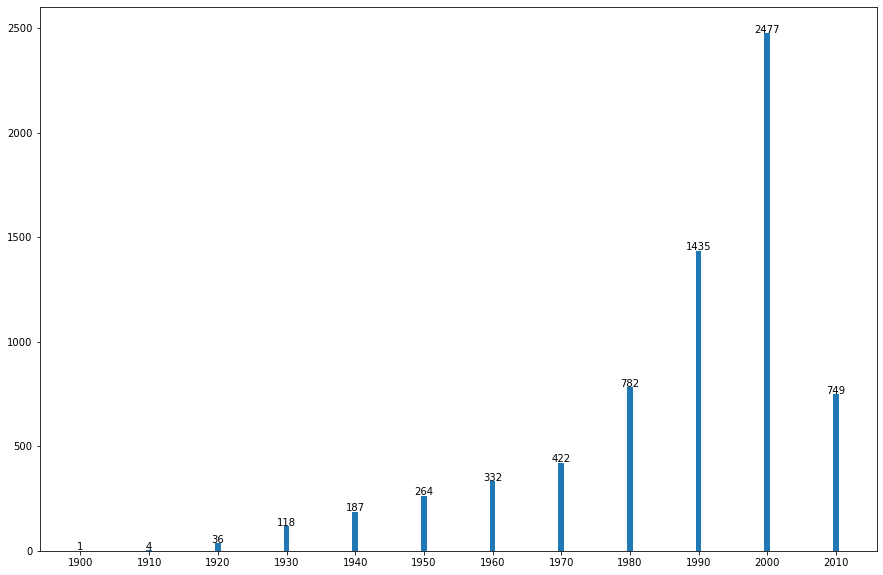

In [11]:
fig,ax = plt.subplots(figsize=(15,10))
ax.set_xticks(year_x)
rects = ax.bar(year_x,y)

# ax.set_xticks(x)

for rect in rects:
    x = rect.get_x()
    width = rect.get_width()
    height = int(rect.get_height())
    if height != 0:
        ax.text(x+width/2,height+2,str(height),ha='center')

#### year를 5년씩 끊어서 살펴보기

In [12]:
year_x = np.arange(1900,2016,5)
y = [0] * len(year_x)
for i in range(len(year_data)):
    y[(year_data['year'][i] - 1900) // 5] += 1

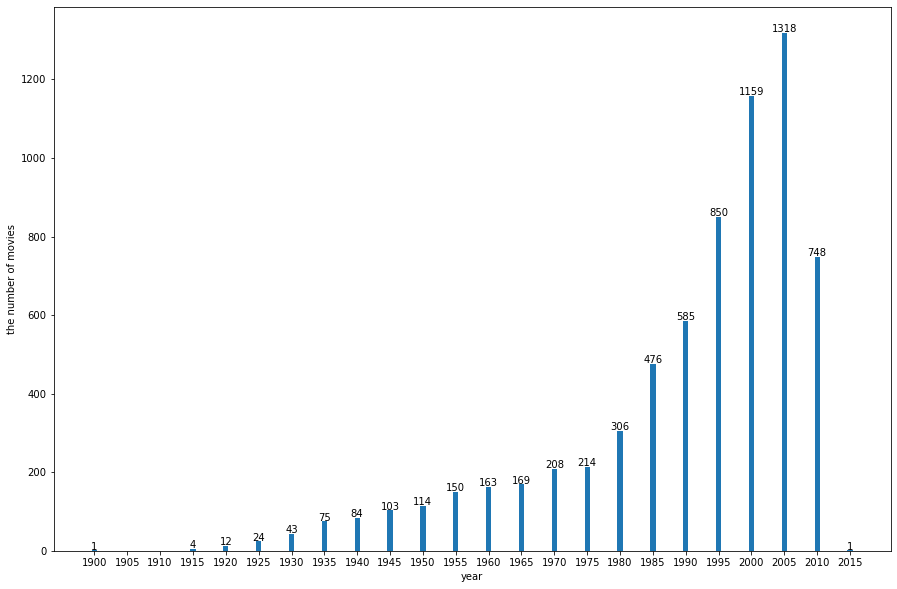

In [13]:
fig,ax = plt.subplots(figsize=(15,10))
rects = ax.bar(year_x,y)

ax.set_xticks(year_x)
ax.set_xlabel("year")
ax.set_ylabel("the number of movies")

for rect in rects:
    x = rect.get_x()
    width = rect.get_width()
    height = int(rect.get_height())
    if height != 0:
        ax.text(x+width/2,height+2,str(height),ha='center')

5년씩 끊어서 갯수를 살펴봤기 때문에 x축에서 가리키는 2005가 2005년이 아니라 2005 ~ 2009년도 까지인 것에 주의!
2005 ~ 2009년도에 출시한 영화가 제일 많은 것 같다!

pie chart를 통해 비율을 살펴보자

In [14]:
ratio = np.array(y)
ratio = ratio / 6807
ratio = np.round(ratio * 100)

ratio

array([ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  1.,  2.,  2.,  2.,  2.,
        2.,  3.,  3.,  4.,  7.,  9., 12., 17., 19., 11.,  0.])

In [15]:
year_x

array([1900, 1905, 1910, 1915, 1920, 1925, 1930, 1935, 1940, 1945, 1950,
       1955, 1960, 1965, 1970, 1975, 1980, 1985, 1990, 1995, 2000, 2005,
       2010, 2015])

([<matplotlib.patches.Wedge at 0x7f1220f34ac0>,
 [Text(1.1, 0.0, '1900'),
  Text(1.1, 0.0, '1905'),
  Text(1.1, 0.0, '1910'),
  Text(1.1, 0.0, '1915'),
  Text(1.1, 0.0, '1920'),
  Text(1.1, 0.0, '1925'),
  Text(1.099434837843914, 0.0352567346066895, '1930'),
  Text(1.0949170244522488, 0.10562532634095854, '1935'),
  Text(1.085899962332452, 0.17555988097051112, '1940'),
  Text(1.0640243508090608, 0.2790200367094752, '1945'),
  Text(1.0196084363341997, 0.41279369733091653, '1950'),
  Text(0.958450580208442, 0.539789297131854, '1955'),
  Text(0.8815549926974782, 0.6579215719598722, '1960'),
  Text(0.7901842971706758, 0.7652507932076159, '1965'),
  Text(0.6579215977527268, 0.8815549734477706, '1970'),
  Text(0.4772721271135518, 0.9910657479100495, '1975'),
  Text(0.24477304438532255, 1.072420699512249, '1980'),
  Text(-0.14066486860268065, 1.0909690163982617, '1985'),
  Text(-0.6579215874355848, 0.8815549811476538, '1990'),
  Text(-1.0640243524417945, 0.2790200304831536, '1995'),
  Text(-0

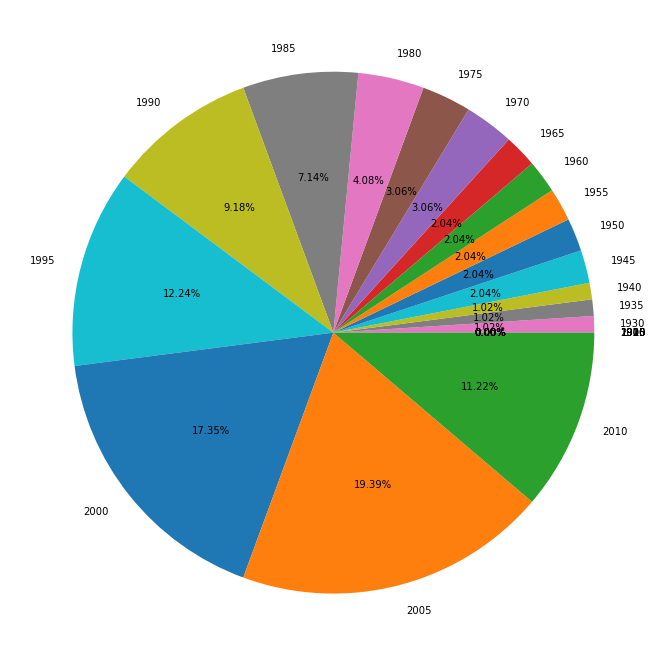

In [16]:
fig,ax = plt.subplots(figsize=(12,12))

plt.pie(ratio,labels = year_x,autopct='%.2f%%')

1995 ~ 2014까지의 영화가 60% 이상을 차지한다

유저가 시청한 영화를 5년씩 끊어서 살펴보자.

In [17]:
year_code = {i:y for i,y in enumerate(range(1900,2016,5))}
year_code

{0: 1900,
 1: 1905,
 2: 1910,
 3: 1915,
 4: 1920,
 5: 1925,
 6: 1930,
 7: 1935,
 8: 1940,
 9: 1945,
 10: 1950,
 11: 1955,
 12: 1960,
 13: 1965,
 14: 1970,
 15: 1975,
 16: 1980,
 17: 1985,
 18: 1990,
 19: 1995,
 20: 2000,
 21: 2005,
 22: 2010,
 23: 2015}

In [18]:
def year_section(year):
    return (year - 1900 )// 5

In [19]:
year_df = pd.merge(train_df, year_data, on=['item'])

In [20]:
year_df['year_code'] = year_df['year'].apply(year_section)

In [22]:
year_df.head()

,user,item,time,year,year_code
0,11,4643,1230782529,2001,20
1,189,4643,1302945016,2001,20
2,294,4643,1288437662,2001,20
3,383,4643,1261996844,2001,20
4,421,4643,1190624541,2001,20


In [29]:
year_df

,user,item,time,year,year_code
0,11,4643,1230782529,2001,20
1,189,4643,1302945016,2001,20
2,294,4643,1288437662,2001,20
3,383,4643,1261996844,2001,20
4,421,4643,1190624541,2001,20
...,...,...,...,...,...
5154466,126426,102880,1386260290,2013,22
5154467,127766,102880,1386261575,2013,22
5154468,130972,102880,1391096866,2013,22
5154469,131347,102880,1370143675,2013,22


In [30]:
row = []
columns = ['user'] + list(year_code.keys())

for name, group in (year_df.groupby('user')):
    row_dict = {k:0 for k in columns}
    row_dict['user'] = name
    for y_code in group['year_code']:
        row_dict[y_code] += 1
    row.append(row_dict)

In [32]:
len(row)

31360

In [33]:
user_year_df = pd.DataFrame(row,columns = columns)

In [35]:
len(user_year_df)

31360

In [36]:
user_year_df.to_csv('./user_year.csv',index=False)

### item, genre

In [46]:
genre_data = pd.read_csv(os.path.join(data_path, 'genres.tsv'), sep='\t')

genre_data.loc[genre_data['item'] == 1]

,item,genre
86,1,Adventure
87,1,Animation
88,1,Children
89,1,Comedy
90,1,Fantasy


In [39]:
genres = np.unique(genre_data['genre'])
movies = np.unique(genre_data['item'])

print(len(genres), len(movies))

18 6807


In [42]:
row = []
columns = ['item'] + list(sorted(genres))
for name, group in genre_data.groupby('item'):
    row_dict = {c:0 for c in columns}
    row_dict['item'] = name
    for g in group['genre']:
        row_dict[g] += 1
    row.append(row_dict)

In [44]:
item_genre_df = pd.DataFrame(row, columns = columns)

In [47]:
item_genre_df.to_csv('./item_genre.csv', index=False)

### director, genre

In [48]:
director_data = pd.read_csv(os.path.join(data_path, 'directors.tsv'), sep='\t')

In [54]:
director_movie = set(np.unique(director_data['item']))

In [62]:
indices = []
for i in item_genre_df['item'].index:
    if item_genre_df['item'][i] not in director_movie:
        indices.append(i)

In [65]:
item_genre_dropped = item_genre_df.drop(indices,axis=0)

In [68]:
director_genre_df = pd.merge(director_data, item_genre_dropped,on=['item'])

In [72]:
director_genre_df.head()

,item,director,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1237,nm0000005,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,5147,nm0000005,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,7327,nm0000005,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,2068,nm0000005,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0
4,7396,nm0000005,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [79]:
genres = [c for c in item_genre_dropped if c != 'item']
columns = ['director'] + genres

In [88]:
row = []
for name, group in director_genre_df.groupby('director'):
    row_dict = {k:0 for k in columns}
    row_dict['director'] = name
    for g in genres:
        row_dict[g] += group[g].sum()
    row.append(row_dict)

In [89]:
len(row)

1340

In [90]:
director_genre_csv = pd.DataFrame(row, columns=columns)

In [93]:
director_genre_csv.to_csv('./director_genre.csv',index=False)

### writer, genre

In [95]:
writer_data = pd.read_csv(os.path.join(data_path, 'writers.tsv'), sep='\t')

In [96]:
print(writer_data['item'].nunique(), writer_data['writer'].nunique())

5648 2989


In [97]:
writer_movie = set(np.unique(writer_data['item']))

In [99]:
indices = []
for i in item_genre_df['item'].index:
    if item_genre_df['item'][i] not in writer_movie:
        indices.append(i)

In [101]:
item_genre_dropped = item_genre_df.drop(indices,axis=0)

In [102]:
len(item_genre_dropped)

5648

In [103]:
writer_genre_candi = pd.merge(writer_data, item_genre_dropped,on=['item'])

In [106]:
writer_genre_candi.head()

,item,writer,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1237,nm0000005,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,5147,nm0000005,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,7327,nm0000005,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,2068,nm0000005,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0
4,7396,nm0000005,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [108]:
genres = [c for c in item_genre_dropped if c != 'item']
columns = ['writer'] + genres

19


In [109]:
row = []
for name, group in writer_genre_candi.groupby('writer'):
    row_dict = {k:0 for k in columns}
    row_dict['writer'] = name
    for g in genres:
        row_dict[g] += group[g].sum()
    row.append(row_dict)

In [112]:
writer_genre_df = pd.DataFrame(row, columns=columns)

In [114]:
writer_genre_df.to_csv("./writer_genre.csv",index=False)

## 데이터 결측치 종합
* years.tsv: 8개
* writers.tsv: 1159개
* directors.tsv: 1304개
* genres.tsv: 0개
* titles.tsv: 0개